C:\Users\rafa_\anaconda3\envs\TFM\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cargando el tokenizador para 'PlanTL-GOB-ES/roberta-base-bne'...
Cargando los datos desde 'dataset_migracion_teseo.json'...


Token indices sequence length is longer than the specified maximum sequence length for this model (12473 > 512). Running this sequence through the model will result in indexing errors


Tokenizando todos los textos para analizar su longitud (esto puede tardar un momento)...

--- Análisis de la Longitud de los Textos (en Tokens) ---
Longitud media: 147476.30 tokens
Mediana de longitud: 138830.00 tokens
Longitud máxima: 806989 tokens
--------------------
Percentil 90: 267314.00 tokens (el 90% de los textos tienen esta longitud o menos)
Percentil 95: 306028.00 tokens (el 95% de los textos tienen esta longitud o menos)
Percentil 99: 505528.30 tokens (el 99% de los textos tienen esta longitud o menos)
--------------------
Con max_length=256, se truncarían 431 de 431 documentos.
Porcentaje de textos truncados: 100.00%

Generando histograma 'distribucion_longitudes.png'...
¡Análisis completado!


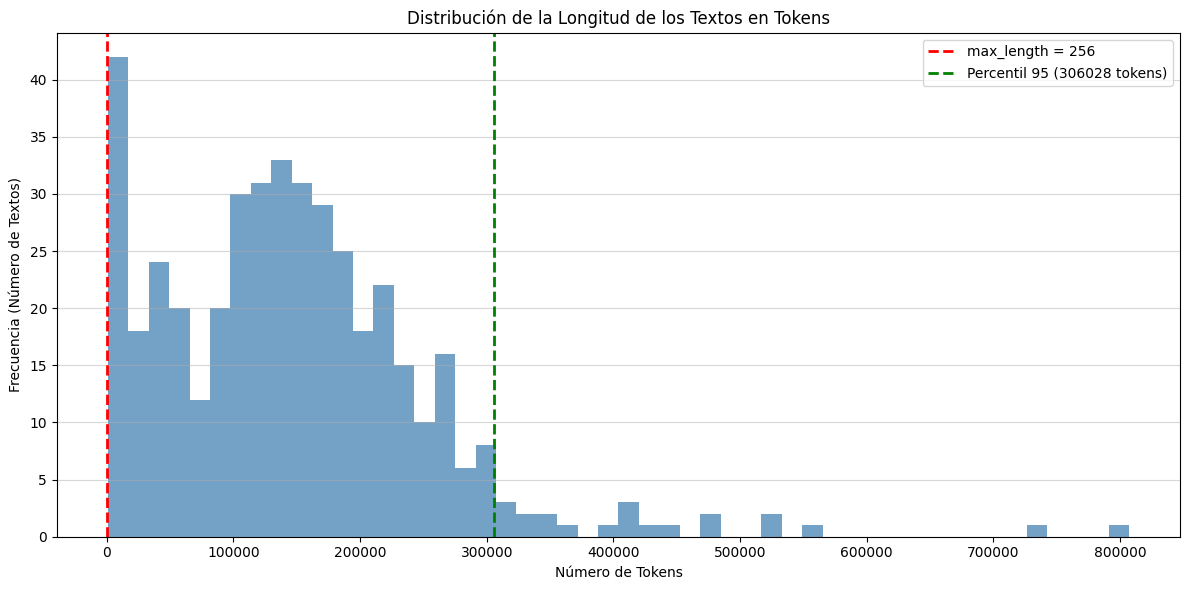

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

# Configuración
MODEL_NAME = "PlanTL-GOB-ES/roberta-base-bne" # Modelo

# Ruta a tu archivo de datos
RUTA_JSON = "dataset_migracion_teseo.json"

# Código de análisis

print(f"Cargando el tokenizador para '{MODEL_NAME}'...")
try:
    # Carga el tokenizador del modelo
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
except Exception as e:
    print(f"Error al cargar el tokenizador. Asegúrate de que el nombre '{MODEL_NAME}' es correcto y tienes conexión a internet.")
    print(e)
    exit()

print(f"Cargando los datos desde '{RUTA_JSON}'...")
# Carga los textos desde tu dataset
with open(RUTA_JSON, encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)
textos = df['text'].tolist()

print("Tokenizando todos los textos para analizar su longitud")
# Calcula la longitud en tokens para cada texto
longitudes_tokens = [len(tokenizer.encode(texto, add_special_tokens=True)) for texto in textos]

# Análisis estadístico
print("\n--- Análisis de la Longitud de los Textos (en Tokens) ---")

# Calcula estadísticas clave
mean_len = np.mean(longitudes_tokens)
median_len = np.median(longitudes_tokens)
max_len = np.max(longitudes_tokens)
p90_len = np.percentile(longitudes_tokens, 90)
p95_len = np.percentile(longitudes_tokens, 95)
p99_len = np.percentile(longitudes_tokens, 99)

print(f"Longitud media: {mean_len:.2f} tokens")
print(f"Mediana de longitud: {median_len:.2f} tokens")
print(f"Longitud máxima: {max_len} tokens")
print("-" * 20)
print(f"Percentil 90: {p90_len:.2f} tokens (el 90% de los textos tienen esta longitud o menos)")
print(f"Percentil 95: {p95_len:.2f} tokens (el 95% de los textos tienen esta longitud o menos)")
print(f"Percentil 99: {p99_len:.2f} tokens (el 99% de los textos tienen esta longitud o menos)")

# Cuenta cuántos textos se truncarían con max_length=256
truncados_con_256 = sum(1 for length in longitudes_tokens if length > 256)
porcentaje_truncado = (truncados_con_256 / len(longitudes_tokens)) * 100

print("-" * 20)
print(f"Con max_length=256, se truncarían {truncados_con_256} de {len(longitudes_tokens)} documentos.")
print(f"Porcentaje de textos truncados: {porcentaje_truncado:.2f}%")

# Visualización
print("\nGenerando histograma 'distribucion_longitudes.png'...")
plt.figure(figsize=(12, 6))
plt.hist(longitudes_tokens, bins=50, alpha=0.75, color='steelblue')
plt.axvline(x=256, color='r', linestyle='--', linewidth=2, label='max_length = 256')
plt.axvline(x=p95_len, color='g', linestyle='--', linewidth=2, label=f'Percentil 95 ({p95_len:.0f} tokens)')
plt.title('Distribución de la Longitud de los Textos en Tokens')
plt.xlabel('Número de Tokens')
plt.ylabel('Frecuencia (Número de Textos)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('distribucion_longitudes.png')
print("¡Análisis completado!")